In [1]:
import pandas as pd
import seaborn as sns
sns.set()

# Exploration constant c

Default value for previous results was c=10000, check cube 2x2 solution result with other values to check for 
optimal value and gain intuition about it.

Run params: `./solver.py -e cube2x2 -m saves/cube2x2-zero-goal-d200-t1/best_1.4547e-02.dat --max-steps 30000 --cuda -o csvs/t3-c2x2-mcts-c=1000.csv`

In [73]:
!ls ../csvs/t3*

../csvs/t3-c2x2-mcts-c=0.01.csv  ../csvs/t3-c2x2-mcts-c=100.csv
../csvs/t3-c2x2-mcts-c=0.1.csv	 ../csvs/t3-c2x2-mcts-c=10.csv
../csvs/t3-c2x2-mcts-c=1000.csv  ../csvs/t3-c2x2-mcts-c=1.csv


In [62]:
# combine data into single data frame
df = pd.concat({
    # old result
    'c=10000':  pd.read_csv("../csvs/c2x2-zero-goal-d200-t1-v2.csv"), 
    # new tests
#    'c=1000000': pd.read_csv("../csvs/t3-c2x2-mcts-c=1000000.csv"),
#    'c=100000':  pd.read_csv("../csvs/t3-c2x2-mcts-c=100000.csv"),
    'c=1000':    pd.read_csv("../csvs/t3-c2x2-mcts-c=1000.csv"),
    'c=100':     pd.read_csv("../csvs/t3-c2x2-mcts-c=100.csv"),
    'c=10':      pd.read_csv("../csvs/t3-c2x2-mcts-c=10.csv"),
    'c=1':       pd.read_csv("../csvs/t3-c2x2-mcts-c=1.csv"),
    'c=0.1':     pd.read_csv("../csvs/t3-c2x2-mcts-c=0.1.csv"),
    'c=0.01':    pd.read_csv("../csvs/t3-c2x2-mcts-c=0.01.csv"),
})
df.index.set_names(['param_c', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)

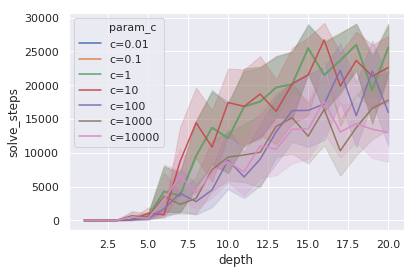

In [63]:
sns.lineplot('depth', 'solve_steps', data=df, hue='param_c');

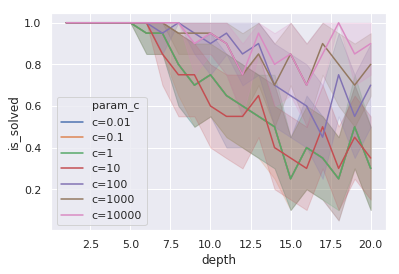

In [68]:
sns.lineplot('depth', 'is_solved', data=df, hue='param_c');

In [79]:
df.groupby('param_c').is_solved.mean()*100

param_c
c=0.01     67.50
c=0.1      67.50
c=1        67.50
c=10       66.75
c=100      84.50
c=1000     89.00
c=10000    92.00
Name: is_solved, dtype: float64

In [83]:
df[df.is_solved==1].groupby('param_c').solve_steps.mean()

param_c
c=0.01     4802.611111
c=0.1      4802.611111
c=1        4802.611111
c=10       4608.898876
c=100      4935.795858
c=1000     5472.053371
c=10000    5948.627717
Name: solve_steps, dtype: float64

TODO: check the branching of resulting trees

TODO: why with increase of C, performance of MCTS drops?